# IBM ID : PNT2022TMID04143
# ARUN NIRANJAN V J, SIVASANKAR S M, SURYA T, ANISH E

### Importing the libraries

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

### Reading the Dataset

In [53]:
df = pd.read_csv("Admission_Predict.csv.xls")
df = df.iloc[:,1:]
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [54]:
corr_matrix = df.corr()
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


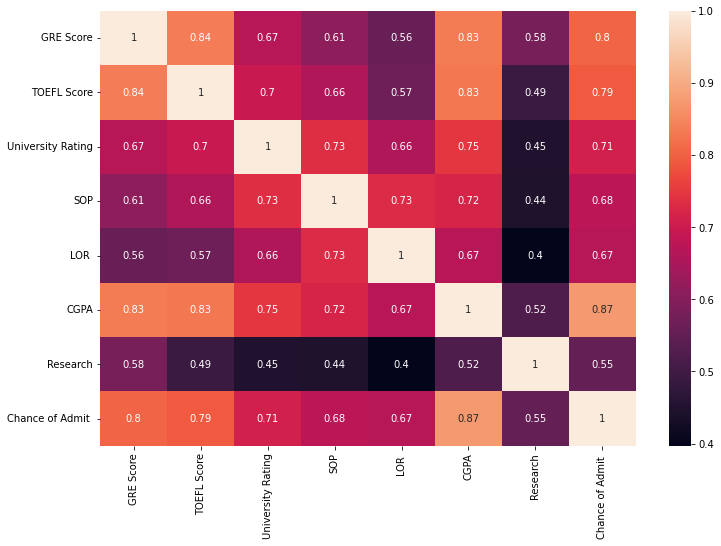

In [55]:
#plotting the correlation matrix as a heatmap

fig = plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

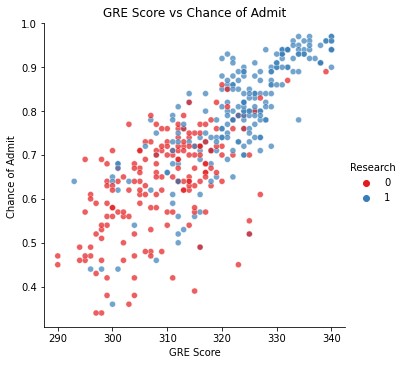

In [56]:
#plotting data which have high correlation

sns.relplot(data=df,x="GRE Score",y="Chance of Admit ",hue="Research",
            palette="Set1",alpha=0.7)
plt.title("GRE Score vs Chance of Admit")
plt.show()

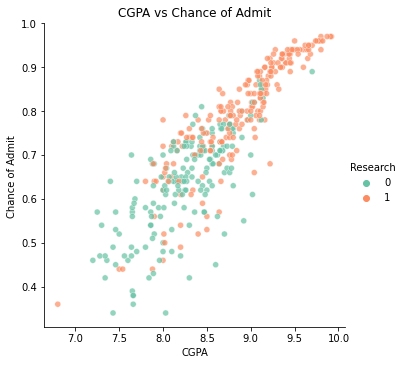

In [57]:
sns.relplot(data=df,x="CGPA",y="Chance of Admit ",hue="Research",
            palette="Set2",alpha=0.7)
plt.title("CGPA vs Chance of Admit")
plt.show()

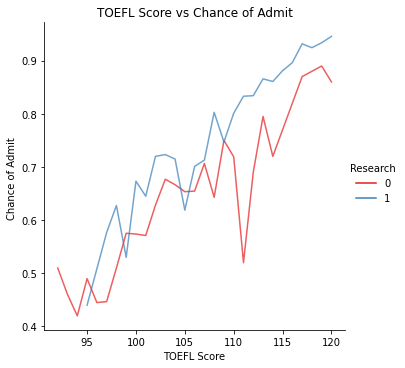

In [58]:
sns.relplot(data=df,x="TOEFL Score",y="Chance of Admit ",hue="Research",
            palette="Set1",alpha=0.7,kind="line",ci=None)
plt.title("TOEFL Score vs Chance of Admit")
plt.show()

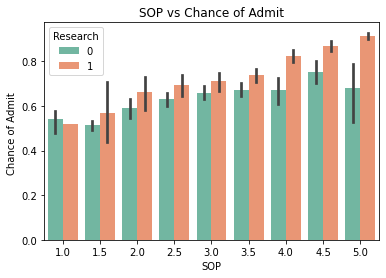

In [59]:
sns.barplot(data=df,x="SOP",y="Chance of Admit ",
            palette="Set2",hue="Research")
plt.title("SOP vs Chance of Admit")
plt.show()

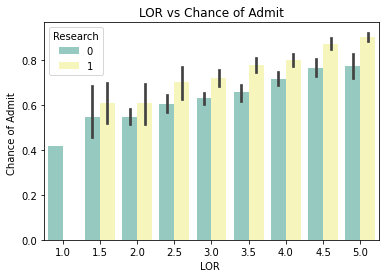

In [60]:
sns.barplot(data=df,x="LOR ",y="Chance of Admit ",
            palette="Set3",hue="Research")
plt.title("LOR vs Chance of Admit")
plt.show()

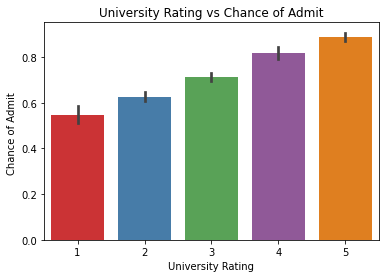

In [61]:
sns.barplot(data=df,x="University Rating",y="Chance of Admit ",
            palette="Set1")
plt.title("University Rating vs Chance of Admit")
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [63]:
x = df[["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA"]]
y = df["Chance of Admit "].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#### Multiple Linear Regression

In [64]:
#implying multiple linear regression and determining its score

multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(x_train,y_train)

y_pred_mlr = multiple_lin_reg.predict(x_test)

r2_score_mlr = r2_score(y_test,y_pred_mlr)
print("Mutiple Linear Regression's Score = {:.3f}".format(r2_score_mlr))

Mutiple Linear Regression's Score = 0.815


#### Decision Tree Regression

In [65]:
#implying decision tree regression and determining its score

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

y_pred_tree = tree_reg.predict(x_test)

r2_score_tree = r2_score(y_test,y_pred_tree)
print("Decision Tree Regression's Score = {:.3f}".format(r2_score_tree))

Decision Tree Regression's Score = 0.620


#### Random Forest Regression

In [66]:
#implying random forest regression and determining its score

ran_for_reg = RandomForestRegressor(n_estimators=100,random_state=42)
ran_for_reg.fit(x_train,y_train)

y_pred_rfr = ran_for_reg.predict(x_test)

r2_score_rfr = r2_score(y_test,y_pred_rfr)
print("Random Forest Regression's Score = {:.3f}".format(r2_score_rfr))

Random Forest Regression's Score = 0.804


C:\Users\Asus\AppData\Local\Temp\ipykernel_9244\3545579415.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ran_for_reg.fit(x_train,y_train)


In [67]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_scaled = mm.fit_transform(x)

In [68]:
x_scaled

array([[0.94      , 0.92857143, 0.75      , 0.875     , 0.875     ,
        0.91346154],
       [0.68      , 0.53571429, 0.75      , 0.75      , 0.875     ,
        0.66346154],
       [0.52      , 0.42857143, 0.5       , 0.5       , 0.625     ,
        0.38461538],
       ...,
       [0.8       , 0.85714286, 0.75      , 1.        , 0.875     ,
        0.84935897],
       [0.44      , 0.39285714, 0.5       , 0.625     , 0.75      ,
        0.63461538],
       [0.86      , 0.89285714, 0.75      , 1.        , 0.75      ,
        0.91666667]])

## Splitting Train & Test Data

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=1)

## Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [71]:
pred_test = lr.predict(x_test)

In [72]:
pred_test

array([[0.7370616 ],
       [0.66832033],
       [0.78074384],
       [0.77510667],
       [0.84494821],
       [0.65334632],
       [0.64847183],
       [0.5535911 ],
       [0.50257436],
       [0.93602867],
       [0.80555655],
       [0.92919713],
       [0.87770853],
       [0.66178502],
       [0.72427965],
       [0.69577077],
       [0.80616514],
       [0.86249348],
       [0.49282115],
       [0.69754626],
       [0.66693036],
       [0.76690379],
       [0.82991497],
       [0.91355964],
       [0.64985696],
       [0.58220633],
       [0.71736843],
       [0.69401311],
       [0.89728008],
       [0.64529417],
       [0.94875358],
       [0.64505063],
       [0.8142976 ],
       [0.7729422 ],
       [0.70454444],
       [0.63324399],
       [0.41918116],
       [0.6700484 ],
       [0.90202933],
       [0.77397146],
       [0.86416678],
       [0.68664087],
       [0.87754726],
       [0.62963647],
       [0.97572282],
       [0.73659885],
       [0.72750786],
       [0.819

In [73]:
y_test

array([[0.67],
       [0.64],
       [0.8 ],
       [0.81],
       [0.86],
       [0.58],
       [0.73],
       [0.56],
       [0.54],
       [0.94],
       [0.87],
       [0.95],
       [0.93],
       [0.67],
       [0.73],
       [0.64],
       [0.89],
       [0.9 ],
       [0.44],
       [0.71],
       [0.57],
       [0.7 ],
       [0.82],
       [0.94],
       [0.65],
       [0.34],
       [0.74],
       [0.72],
       [0.93],
       [0.66],
       [0.96],
       [0.65],
       [0.78],
       [0.78],
       [0.75],
       [0.5 ],
       [0.36],
       [0.62],
       [0.91],
       [0.78],
       [0.83],
       [0.69],
       [0.89],
       [0.54],
       [0.96],
       [0.76],
       [0.76],
       [0.8 ],
       [0.66],
       [0.66],
       [0.55],
       [0.61],
       [0.82],
       [0.63],
       [0.76],
       [0.92],
       [0.49],
       [0.45],
       [0.77],
       [0.85],
       [0.91],
       [0.57],
       [0.91],
       [0.72],
       [0.59],
       [0.76],
       [0.

#### Mean Squared Error (MSE)

In [74]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(pred_test,y_test)

In [75]:
mse

0.004260810050671111

#### Root Mean Squared Error (RMSE)

In [76]:
rmse = np.sqrt(mse)

In [77]:
rmse

0.06527488070208257

#### R2 Score

In [78]:
r2_score(pred_test, y_test)

0.7168318679092455

#### Mean Absolute Error (MAE)

In [79]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(pred_test, y_test)

0.04555243196630538

### Confusion Matrix

In [80]:
actual = np.random.binomial(1, 0.9, size = 1000)
predicted = np.random.binomial(1, 0.9, size = 1000)

In [81]:
from sklearn import metrics

In [82]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)

In [83]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

In [84]:
import matplotlib.pyplot as plt

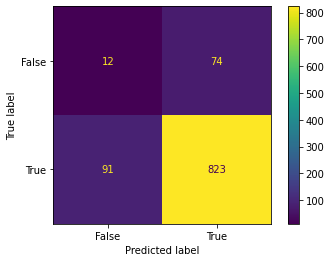

In [85]:
cm_display.plot()
plt.show()

In [86]:
Accuracy = metrics.accuracy_score(actual, predicted)
Accuracy

0.835

In [87]:
Precision = metrics.precision_score(actual, predicted)
Precision

0.9175027870680045

In [88]:
Sensitivity_recall = metrics.recall_score(actual, predicted)
Sensitivity_recall

0.9004376367614879

In [89]:
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
Specificity

0.13953488372093023

In [90]:
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity})

{'Accuracy': 0.835, 'Precision': 0.9175027870680045, 'Sensitivity_recall': 0.9004376367614879, 'Specificity': 0.13953488372093023}


### Classification Report

In [91]:
from sklearn.metrics import classification_report
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.12      0.14      0.13        86
           1       0.92      0.90      0.91       914

    accuracy                           0.83      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.85      0.83      0.84      1000



## Validation Methods

### 1. K-Fold

In [92]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [1.         1.         0.83333333 0.93333333 0.8       ]
Average CV Score:  0.9133333333333333
Number of CV Scores used in Average:  5


### 2.Stratified K-Fold

In [93]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Average CV Score:  0.9533333333333334
Number of CV Scores used in Average:  5


### 3. Leave-One-Out (LOO)

In [94]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

loo = LeaveOneOut()

scores = cross_val_score(clf, X, y, cv = loo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average CV Score:  0.94
Number of CV Scores used in Average:  150


### 4. Leave-P-Out (LPO)

In [95]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeavePOut, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

lpo = LeavePOut(p=2)

scores = cross_val_score(clf, X, y, cv = lpo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [1. 1. 1. ... 1. 1. 1.]
Average CV Score:  0.9382997762863534
Number of CV Scores used in Average:  11175


### 5.Shuffle Split

In [96]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)

scores = cross_val_score(clf, X, y, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.93333333 0.95555556 0.93333333 0.95555556 0.95555556]
Average CV Score:  0.9466666666666667
Number of CV Scores used in Average:  5


### Creating Pickle (.pkl) file for Integrating in Flask Environment

In [62]:
import pickle



In [10]:
!pip install ibm_watson_machine_learning

In [28]:
from ibm_watson_machine_learning import APIClient
import json

In [50]:
uml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "poJ22ua6BCG9qY33B8fkgnz1bnP1f9DZqUlF9NkBM1bZ"
}

client = APIClient(uml_credentials)

In [51]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [52]:
space_uid = guid_from_space_name(client, 'university')
print("Space UID = " + space_uid)


Space UID = 4f0253e5-f162-4eec-84ba-72e01fb69ab9


In [53]:
client.set.default_space(space_uid)



'SUCCESS'

In [54]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [55]:
import sklearn
sklearn.__version__

'1.0.2'

In [64]:
MODEL_NAME = 'university'
DEPLOYMENT_NAME = 'uni'


In [65]:
software_spec_uid = client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [66]:
model_props = {
    client.repository.ModelMetaNames.NAME: MODEL_NAME,
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0 ',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}